[*********************100%***********************]  99 of 99 completed
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 
HTTP Error 401: 



Sharpe Ratio: 0.4638
Information Ratio: -0.0934

Cumulative Portfolio Return: 100.90%
Cumulative Benchmark Return: 108.26%
Annualized Portfolio Return: 12.83%
Annualized Benchmark Return: 13.54%
Annualized Portfolio Volatility: 19.29%

--- Sector Attribution ---
Sector Weights:
Sector
other sectors             0.530612
Financial Services        0.122449
Healthcare                0.071429
Consumer Defensive        0.061224
Real Estate               0.051020
Utilities                 0.051020
Technology                0.040816
Industrials               0.030612
Basic Materials           0.010204
Communication Services    0.010204
Consumer Cyclical         0.010204
Energy                    0.010204

Annualized Sector Returns (approx):
other sectors             0.076710
Financial Services        0.023523
Consumer Defensive        0.008295
Real Estate               0.006414
Technology                0.005844
Utilities                 0.004913
Industrials               0.004719
Healthcare 

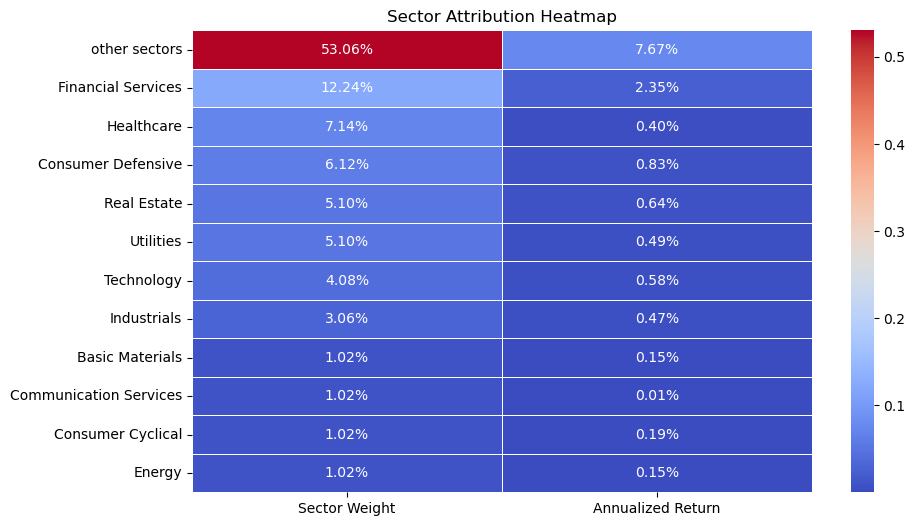

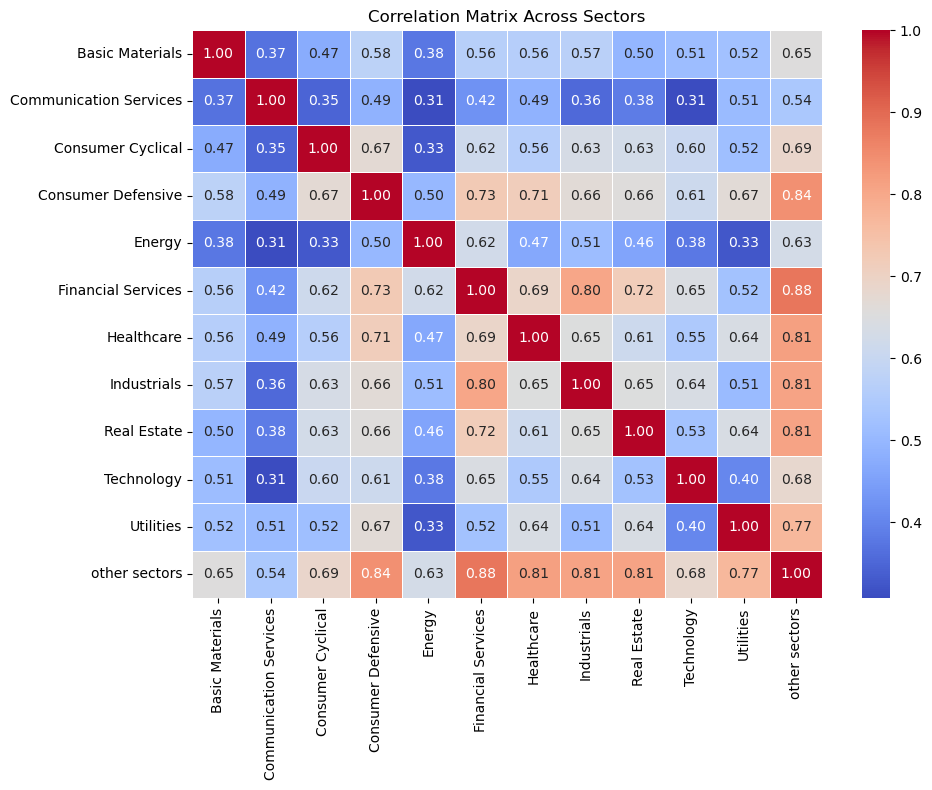

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Portfolio and benchmark

portfolio_tickers = [
    'AAPL', 'MSFT', 'JNJ', 'PG', 'KO', 'PEP', 'XOM', 'CVX', 'MRK', 'ABBV',
    'T', 'VZ', 'WMT', 'MCD', 'HD', 'TXN', 'AMGN', 'LMT', 'UNP', 'JPM',
    'CVS', 'MMM', 'CAT', 'IBM', 'DOW', 'MO', 'PM', 'SO', 'DUK', 'CL',
    'MDT', 'TGT', 'GD', 'EMR', 'LVS', 'EXC', 'FRT', 'AFL',
    'BLK', 'APD', 'NUE', 'PFE', 'USB', 'ETN', 'SPG', 'ADM', 'TRV', 'O',
    'DE', 'CSCO', 'AVGO', 'INTC', 'ORCL', 'QCOM', 'TROW', 'MS', 'BAC', 'GS',
    'PNC', 'SCHW', 'COF', 'AXP', 'MET', 'PRU', 'BK', 'HIG', 'ALL', 'AIG',
    'BDX', 'CI', 'HUM', 'ZBH', 'BMY', 'GILD', 'HSY', 'KMB', 'SYY', 'KR',
    'PSA', 'PLD', 'DLR', 'VTR', 'WELL', 'ARE', 'DTE', 'AEP', 'ED', 'NEE',
    'PEG', 'WEC', 'AWK', 'LNT', 'ATO', 'CMS', 'EIX', 'FE', 'ES', 'D'
]

portfolio_weights = [1 / len(portfolio_tickers)] * len(portfolio_tickers)

# Benchmark setup

benchmark_ticker = '^GSPC'
tickers = portfolio_tickers + [benchmark_ticker]

# Equal weights
portfolio_weights = [1 / len(portfolio_tickers)] * len(portfolio_tickers)

# Date range
start_date = '2000-01-01'
end_date = '2025-01-01'

# Download data with adjusted close prices from yahoo finance
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)

# Handle multi-index or single-level columns
if isinstance(data.columns, pd.MultiIndex):
    close_prices = data['Close']
else:
    close_prices = data

# Daily returns of each ticker/stock
returns = close_prices.pct_change().dropna()

# Filter only available tickers (in case some didn't download)
available_tickers = [t for t in portfolio_tickers if t in returns.columns]
valid_weights = [portfolio_weights[i] for i, t in enumerate(portfolio_tickers) if t in available_tickers]

# Normalize weights to sum to 1
normalized_weights = [w / sum(valid_weights) for w in valid_weights]

# Portfolio & benchmark returns
portfolio_returns = (returns[available_tickers] * normalized_weights).sum(axis=1)
benchmark_returns = returns[benchmark_ticker]

# Risk-free rate (annualized to daily)
risk_free_rate = 0.05
daily_rf = risk_free_rate / 252

# Sharpe Ratio
excess_returns = portfolio_returns - daily_rf
sharpe_ratio = (excess_returns.mean() / excess_returns.std()) * np.sqrt(252)

# Information Ratio
active_returns = portfolio_returns - benchmark_returns
tracking_error = active_returns.std()
information_ratio = (active_returns.mean() / tracking_error) * np.sqrt(252)

# Cumulative returns
cumulative_portfolio_return = (1 + portfolio_returns).prod() - 1
cumulative_benchmark_return = (1 + benchmark_returns).prod() - 1

# Annualized return
annualized_portfolio_return = (1 + cumulative_portfolio_return) ** (252 / len(portfolio_returns)) - 1
annualized_benchmark_return = (1 + cumulative_benchmark_return) ** (252 / len(benchmark_returns)) - 1

# Annualized volatility
annualized_volatility = portfolio_returns.std() * np.sqrt(252)

# --- SECTOR ATTRIBUTION ---

# Fetch sector info and dividend yields using yfinance Tickers
sector_dict = {}
dividend_yields = {}

for ticker in available_tickers:
    tk = yf.Ticker(ticker)
    info = tk.info
    sector = info.get('sector', 'other sectors')
    div_yield = info.get('dividendYield', 0.0)  # dividendYield is in decimal (e.g., 0.015 for 1.5%)
    
    sector_dict[ticker] = sector
    dividend_yields[ticker] = div_yield if div_yield is not None else 0.0

# Create DataFrame for sectors and weights
df_sectors = pd.DataFrame({
    'Ticker': available_tickers,
    'Weight': normalized_weights,
    'Sector': [sector_dict[t] for t in available_tickers],
    'DividendYield': [dividend_yields[t] for t in available_tickers]
})

# Calculate sector weights
sector_weights = df_sectors.groupby('Sector')['Weight'].sum()

# Calculate sector return contribution (average daily returns weighted by portfolio weights)
sector_returns = pd.Series(dtype=float)
for sector in sector_weights.index:
    tickers_in_sector = df_sectors[df_sectors['Sector'] == sector]['Ticker']
    weights_in_sector = df_sectors[df_sectors['Sector'] == sector]['Weight']
    sector_ret = (returns[tickers_in_sector] * weights_in_sector.values).sum(axis=1).mean() * 252  # annualized return approx
    sector_returns[sector] = sector_ret

# Calculate weighted average dividend yield of portfolio
portfolio_dividend_yield = (df_sectors['DividendYield'] * df_sectors['Weight']).sum()

# --- BETA CALCULATION ---

# Beta = Covariance(portfolio, benchmark) / Variance(benchmark)
cov_matrix = np.cov(portfolio_returns, benchmark_returns)
portfolio_beta = cov_matrix[0, 1] / cov_matrix[1, 1]

# --- OUTPUT ---

print(f"\nSharpe Ratio: {sharpe_ratio:.4f}")
print(f"Information Ratio: {information_ratio:.4f}")

print(f"\nCumulative Portfolio Return: {cumulative_portfolio_return:.2%}")
print(f"Cumulative Benchmark Return: {cumulative_benchmark_return:.2%}")
print(f"Annualized Portfolio Return: {annualized_portfolio_return:.2%}")
print(f"Annualized Benchmark Return: {annualized_benchmark_return:.2%}")
print(f"Annualized Portfolio Volatility: {annualized_volatility:.2%}")

print("\n--- Sector Attribution ---")
print("Sector Weights:")
print(sector_weights.sort_values(ascending=False).to_string())
print("\nAnnualized Sector Returns (approx):")
print(sector_returns.sort_values(ascending=False).to_string())

print(f"\nPortfolio Weighted Dividend Yield: {portfolio_dividend_yield:.2%}")

print(f"Portfolio Beta: {portfolio_beta:.4f}")


# Prepare data for heatmap: create a DataFrame for sector weights and returns side-by-side
sector_df = pd.DataFrame({
    'Sector Weight': sector_weights,
    'Annualized Return': sector_returns
}).sort_values('Sector Weight', ascending=False)

# Plot heatmap for sector weights and returns
plt.figure(figsize=(10, 6))
sns.heatmap(sector_df, annot=True, fmt=".2%", cmap='coolwarm', linewidths=0.5)
plt.title('Sector Attribution Heatmap')
plt.show()

# --- CORRELATION MATRIX ACROSS SECTORS ---

# Create a dictionary to store sector-level daily returns
sector_daily_returns = {}

for sector in sector_weights.index:
    sector_tickers = df_sectors[df_sectors['Sector'] == sector]
    tickers_in_sector = sector_tickers['Ticker']
    weights_in_sector = sector_tickers['Weight']
    
    # Normalize sector weights to sum to 1 (within each sector)
    normalized_sector_weights = weights_in_sector / weights_in_sector.sum()
    
    # Calculate sector return as weighted average of constituent stock returns
    sector_return = (returns[tickers_in_sector] * normalized_sector_weights.values).sum(axis=1)
    sector_daily_returns[sector] = sector_return

# Create DataFrame of sector daily returns
sector_returns_df = pd.DataFrame(sector_daily_returns)

# Compute correlation matrix
sector_corr_matrix = sector_returns_df.corr()

# Plot heatmap of sector correlations
plt.figure(figsize=(10, 8))
sns.heatmap(sector_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Across Sectors')
plt.tight_layout()
plt.show()
